dataset from [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection) and stored the data locally. Data is also available on github as the storage size on git allows for it. 

Using this dataset as practice as the images are of different dimensions, similar to another project im working on for a business. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # good for separating RGB properties of an image. 
import glob

In [6]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 77B6-1F68

 Directory of C:\Users\Rudol\0_Github\Brain MRI Data\Brain-MRI-Image-Classifier

24/08/2023  03:14 PM    <DIR>          .
24/08/2023  03:14 PM    <DIR>          ..
29/07/2023  04:02 PM    <DIR>          .ipynb_checkpoints
20/07/2023  09:04 PM    <DIR>          dataset
24/08/2023  03:14 PM             2,659 working.ipynb
               1 File(s)          2,659 bytes
               4 Dir(s)  955,088,695,296 bytes free


# Reading a single image

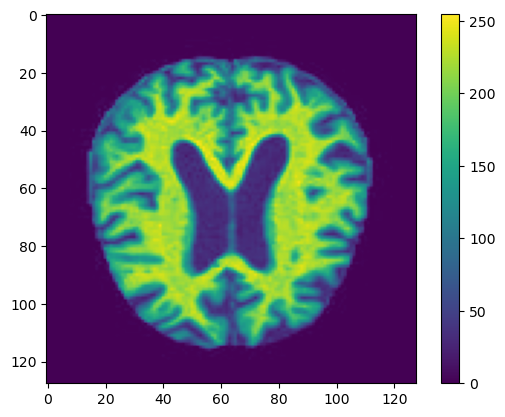

In [17]:
from PIL import Image

image = Image.open('./dataset/Mild_Demented/mild.jpg')
plt.imshow(image)
plt.colorbar()

# Reading multiple images

In [20]:
data_path = './dataset/'
demented_type = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'] #should leard how to extract this with code


for folder in demented_type:
    file_name = glob.glob(data_path + folder + '*.jpg')
    

In [71]:
data_path = './dataset/'

mild = [] 
very_mild = []
healthy = [] 
moderate = []

for i in glob.glob(data_path + 'Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128)) 
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)


for i in glob.glob(data_path + 'Very_Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)
    very_mild.append(image)

for i in glob.glob(data_path + 'Non_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)
    healthy.append(image)

for i in glob.glob(data_path + 'Moderate_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)
    moderate.append(image)


In [72]:
len(very_mild)

2240

In [73]:
mild = np.array(mild)
mild.shape # cannot do this with lists. 

(6400, 128, 128, 3)

In [74]:
very_mild = np.array(very_mild)

moderate = np.array(moderate)

healthy = np.array(healthy)

In [75]:
all_types = np.concatenate((mild, very_mild, moderate, healthy))

In [76]:
all_types.shape # all images combined into one dimension. the first dimension is the sum of all the demented types

(11904, 128, 128, 3)

# Visualisation

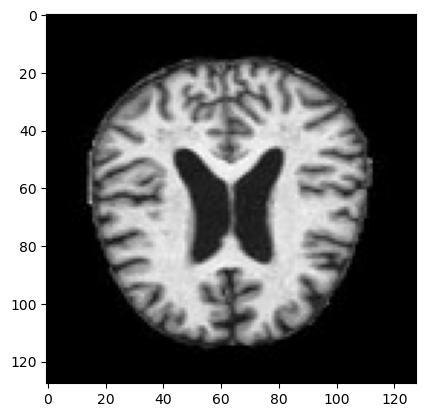

In [77]:
plt.imshow(very_mild[0])

In [78]:
def plot_random(mild, very_mild, moderate, healthy, num= 3):
    mild_images = mild[np.random.choice(mild.shape[0], num, replace = False)]
    very_mild_images = very_mild[np.random.choice(very_mild.shape[0], num, replace = False)]
    moderate_images = moderate[np.random.choice(moderate.shape[0], num, replace = False)]
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    
    plt.figure(figsize = (16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_images[i])
    
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('very_mild')
        plt.imshow(very_mild[i])
        
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('mild')
        plt.imshow(mild_images[i])
        
    plt.figure(figsize= (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('moderate')
        plt.imshow(moderate_images[i])

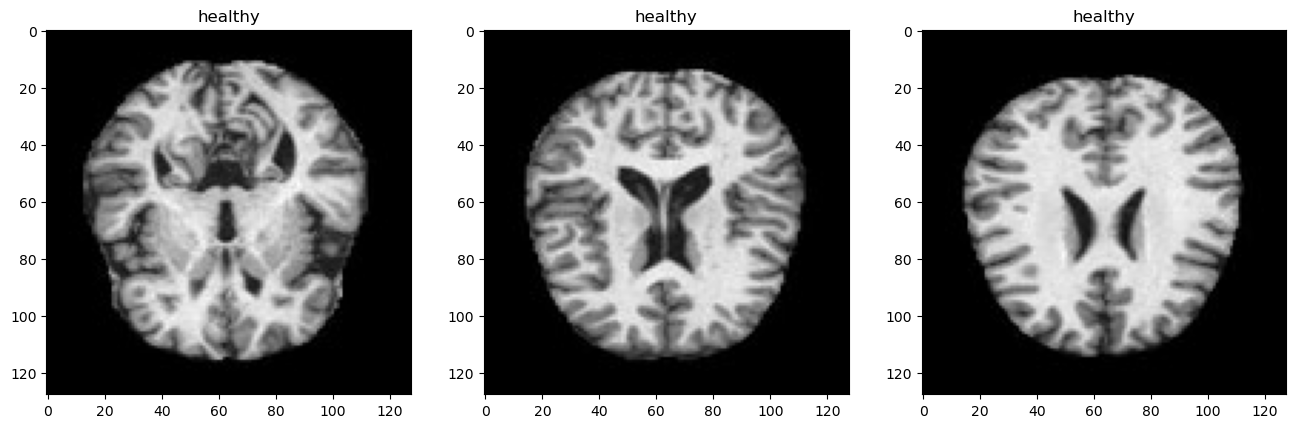

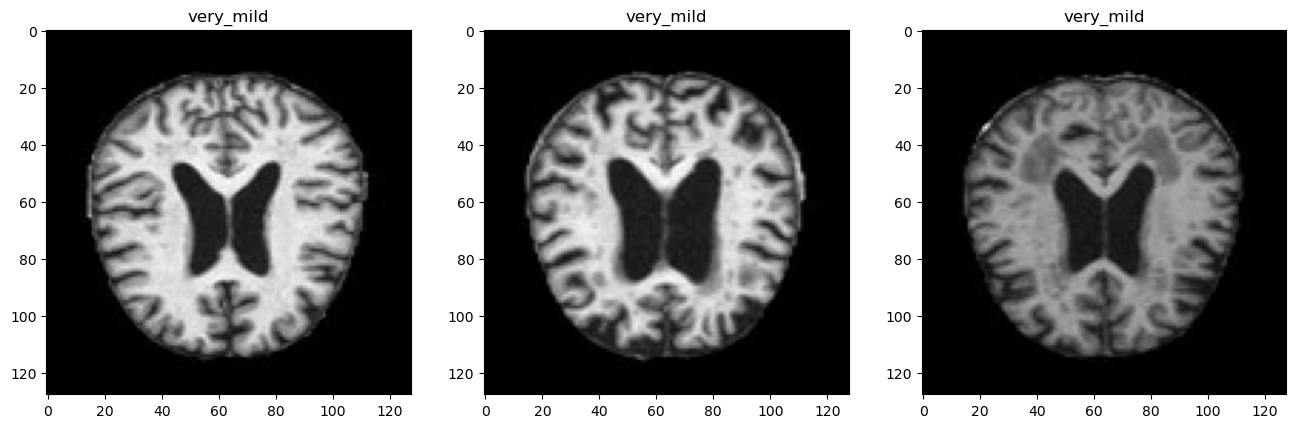

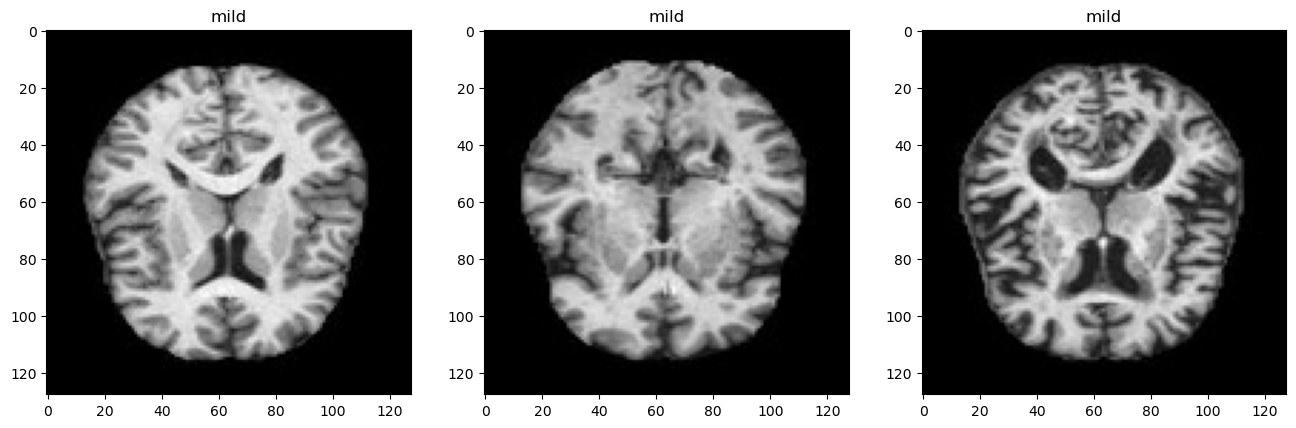

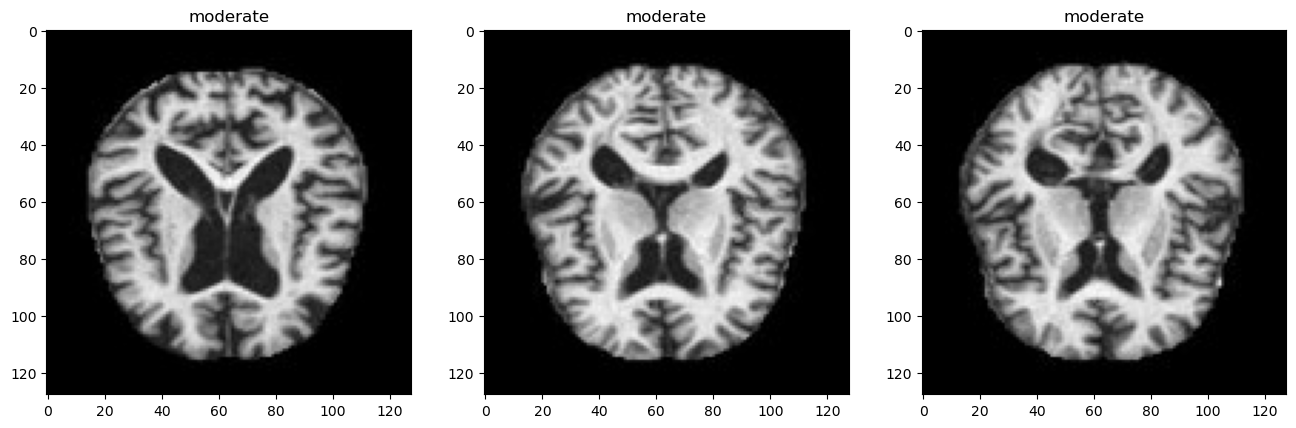

In [79]:
plot_random(mild, very_mild, moderate, healthy)